## Predicción del consumo de gasolina

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


### Importar librerías

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

### Descargar el conjunto de datos

In [2]:
data = pd.read_csv('petrol_consumption.csv')

### Exploración de los datos

In [3]:
data.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
# Obtenga el tamaño del dataset (número de ejemplos y número de características) con la función shape
data.shape
# Visualice el DataFrame con la función head(), tail() o sample()
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
X = data.iloc[:, 0:4]
X.shape

(48, 4)

In [6]:
y = data.Petrol_Consumption
y.shape

(48,)

In [7]:
#Separe el conjunto de datos en entrenamiento y prueba  (relación: 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
print('Tamaño del conjunto de datos de entrenamiento: ', X_train.shape)
print('Tamaño del conjunto de datos de prueba: ', X_test.shape)

Tamaño del conjunto de datos de entrenamiento:  (38, 4)
Tamaño del conjunto de datos de prueba:  (10, 4)


### Preprocesamiento de los datos

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Definición del modelo

In [10]:
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(4,)))
model.add(Dense(1))
model.compile(loss='mse' , optimizer='adam', metrics=["mean_squared_error"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


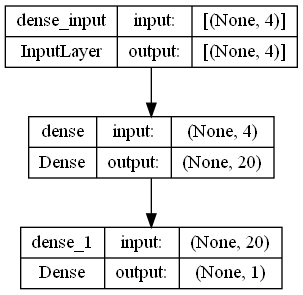

In [12]:
plot_model(model, show_shapes=True)

### Entrenamiento del modelo

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=?,  mode='min',  verbose=1)

In [ ]:
history = model.fit(?, ?, validation_data=(?, ?),epochs=?,verbose=1)

### Evaluación del modelo

In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_pred,y_test)))

In [ ]:
y_pred.flatten()

In [ ]:
y_test

In [ ]:
plt.scatter(y_test,y_pred, edgecolors=(0, 0, 0))
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

### Realizar una predicción

In [ ]:
new_value = [8.0, 3448, 5399, 0.5]
# Escalar la nueva observación
new_value = sc.transform([new_value])
# Utilizar predict para predecir la nueva observación
prediction = model.predict(new_value)
print('Predicción: ', prediction)